In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive

Mounted at /content/drive
/content/drive


In [2]:
pip install statsmodels --upgrade

     |████████████████████████████████| 9.8 MB 10.0 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg
#from statsmodels.tsa.stattools import adfuller
#from statsmodels.graphics.tsaplots import plot_pacf

In [4]:
data = pd.read_csv('/content/drive/MyDrive/ML DS539/CoLab/training.csv', encoding='latin1')
test_data = pd.read_csv('/content/drive/MyDrive/ML DS539/CoLab/testing.csv', encoding='latin1')

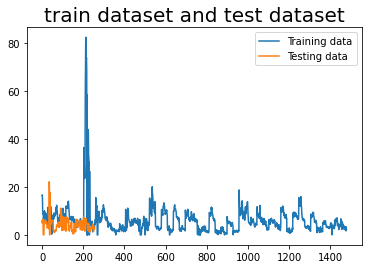

In [5]:
plt.title('train dataset and test dataset', size=20)
plt.plot(data['Next_Year_Crime_Rate'], label='Training data')
plt.plot(test_data['Next_Year_Crime_Rate'], label='Testing data')
plt.legend();

P-value:  3.476373715549803e-08


/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


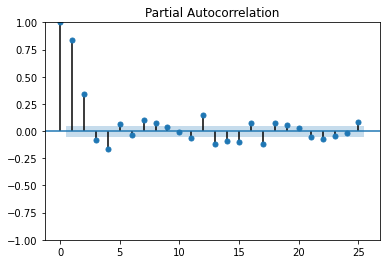

In [6]:
from statsmodels.tsa.stattools import adfuller
#
# Run the test
#
df_stationarityTest = adfuller(data['Next_Year_Crime_Rate'], autolag='AIC')
#
# Check the value of p-value
#
print("P-value: ", df_stationarityTest[1])
#
# Next step is to find the order of AR model to be trained
# for this, we will plot partial autocorrelation plot to assess
# the direct effect of past data on future data
#
from statsmodels.graphics.tsaplots import plot_pacf
pacf = plot_pacf(data['Next_Year_Crime_Rate'], lags=25)

In [7]:
train_data = data['Next_Year_Crime_Rate']
test_data2 = test_data['Next_Year_Crime_Rate']

In [16]:
model = AutoReg(train_data, lags=600).fit()
print(model.summary())

                             AutoReg Model Results                              
Dep. Variable:     Next_Year_Crime_Rate   No. Observations:                 1479
Model:                     AutoReg(600)   Log Likelihood               -1029.754
Method:                 Conditional MLE   S.D. of innovations              0.781
Date:                  Sat, 27 Nov 2021   AIC                           3263.507
Time:                          03:14:29   BIC                           6140.336
Sample:                             600   HQIC                          4363.720
                                   1479                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         1.8508      0.431      4.290      0.000       1.005       2.696
Next_Year_Crime_Rate.L1       0.7065      0.034     20.975      0.000 

In [17]:
(len(data) + len(test_data) -1)

1733

In [18]:
forecasts = model.predict(start=len(train_data), end=(len(data) + len(test_data) -1), dynamic=False)

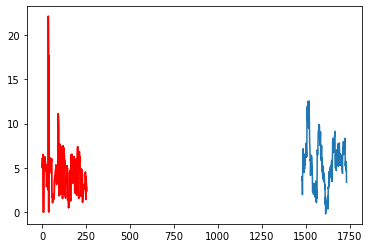

In [19]:
plt.plot(forecasts)
plt.plot(test_data2, color='red')
plt.plot(test_data2, color='red')

In [20]:
from sklearn.metrics import mean_squared_error as mse

error = mse(test_data2, forecasts)

print(f'test MSE: {error:.3}')
print(f'test RMSE: {error ** 0.5:.3}')

test MSE: 11.9
test RMSE: 3.45
